## Portfolio assignment 15
30 min: Train a decision tree to predict the species of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

Optional: Perform the same tasks but try to predict the sex of the pinguin based on the other columns

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import pandas as pd
import seaborn as sns
import numpy as np
penguins = sns.load_dataset("penguins").dropna()

Split the penguin dataset into a train (70%) and test (30%) set.

In [92]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, random_state=42, stratify=penguins['island'])
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


Use the train set to fit a DecisionTreeClassifier

In [93]:
features = ['body_mass_g']
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(penguins_train[features], penguins_train['island'])

DecisionTreeClassifier(max_depth=2)

Create decision tree model

In [94]:
def plot_tree_classification(model, features, class_names):
    dot_data = tree.export_graphviz(model, 
                                    out_file=None, 
                                    feature_names=features, 
                                    class_names=class_names, 
                                    filled=True, 
                                    rounded=True, 
                                    special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree")
    return graph

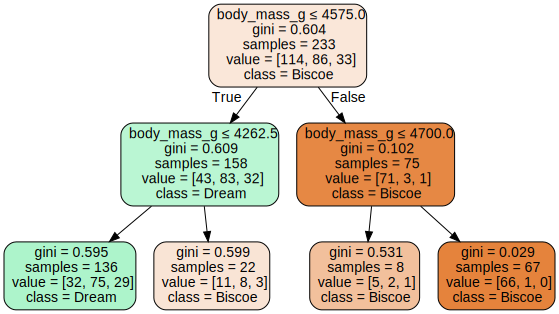

In [95]:
plot_tree_classification(dt, features, np.sort(penguins_train.island.unique()))

Predict using the test array

In [96]:
predictions = dt.predict(penguins_test[features])
predictions

array(['Biscoe', 'Dream', 'Dream', 'Dream', 'Dream', 'Dream', 'Dream',
       'Dream', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe', 'Dream', 'Dream',
       'Dream', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe', 'Dream', 'Dream',
       'Biscoe', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe', 'Dream', 'Biscoe',
       'Biscoe', 'Dream', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe', 'Dream',
       'Dream', 'Dream', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe', 'Dream',
       'Dream', 'Biscoe', 'Dream', 'Biscoe', 'Dream', 'Biscoe', 'Dream',
       'Dream', 'Biscoe', 'Dream', 'Biscoe', 'Dream', 'Biscoe', 'Dream',
       'Biscoe', 'Biscoe', 'Dream', 'Biscoe', 'Biscoe', 'Dream', 'Biscoe',
       'Dream', 'Dream', 'Dream', 'Biscoe', 'Dream', 'Biscoe', 'Dream',
       'Dream', 'Dream', 'Dream', 'Dream', 'Dream', 'Dream', 'Dream',
       'Biscoe', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe', 'Dream',
       'Dream', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe', 'Dream', 'Dream',
       'Dream', 'Dream', 'Dream', 'Dream', 'Biscoe

Calculating the accuracy of the tree 

In [97]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

predictionsOnTrainset = dt.predict(penguins_train[features])
predictionsOnTestset = dt.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.island)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.island)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.6738197424892703
Accuracy on test set 0.71
